In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [268]:
d=pd.read_csv('./mnist_data/train.csv')

In [269]:
print d.shape

(42000, 785)


In [275]:
data=d.values[:,1:]
labels=d.values[:,0]

print data.shape,labels.shape

(42000, 784) (42000,)


In [276]:
mean=data.mean(axis=0)
std=data.std(axis=0)
data_std=(data-mean)/(std+1e-3)
print data_std.std(axis=0).shape

(784,)


In [277]:
cov=np.cov(data,rowvar=0)
print cov.shape
cov_std=np.cov(data_std,rowvar=0)
print cov_std.shape

(784, 784)
(784, 784)


In [278]:
eig_val,eig_vec=np.linalg.eig(cov)
print eig_vec.shape
eig_val_std,eig_vec_std=np.linalg.eig(cov_std)

(784, 784)


In [279]:
eig_val.sort()
eig_val_std.sort()
eig_val=eig_val[::-1]
eig_val_std=eig_val_std[::-1]
eig_cm=np.cumsum(eig_val)/np.sum(eig_val)
eig_cm_std=np.cumsum(eig_val_std)/np.sum(eig_val_std)
print eig_cm.shape


(784,)


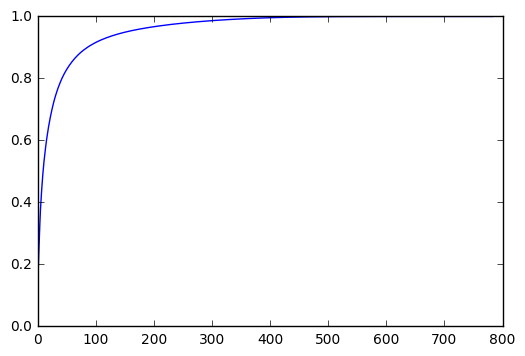

In [280]:
plt.figure(0)
plt.plot(eig_cm,'blue')
plt.show()

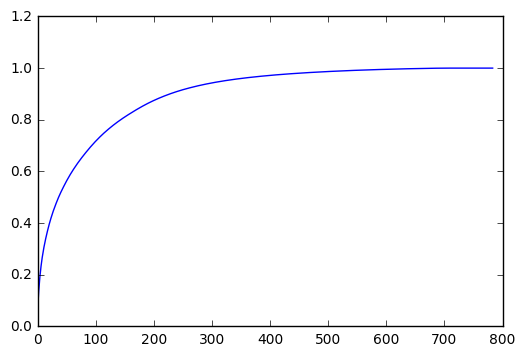

In [281]:
plt.figure(0)

plt.plot(eig_cm_std,'blue')
plt.show()


In [282]:
#so always normalize data

In [283]:
for ix in range (eig_cm_std.shape[0]):
    if eig_cm_std[ix]>=0.98:
        print ix
        break

448


In [284]:
print eig_vec.shape

(784, 784)


In [285]:
eig_pair=[(np.abs(eig_val_std[ix]),eig_vec_std[:,ix]) for ix in range (eig_vec.shape[0])]
eig_pair.sort(key=lambda x:x[0])
eig_pair.reverse()

In [286]:
#selecting first 441 axis
a=np.zeros((784,441))
for ix in range(0,441):
    a[:,ix]=eig_pair[ix][1]
print a.shape
print data_std.shape
new=np.dot(data,a)
print new.shape


(784, 441)
(42000, 784)
(42000, 441)


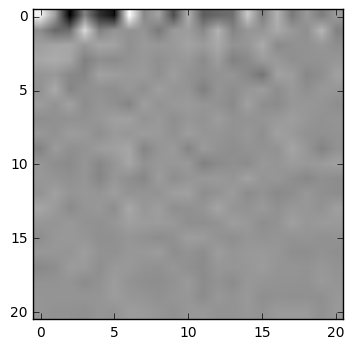

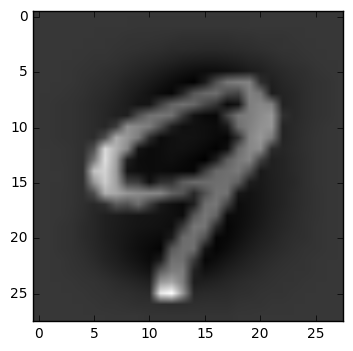

In [287]:
plt.figure(0)
plt.imshow(new[100].reshape(21,21),cmap='gray')
plt.figure(1)
plt.imshow(data_std[100].reshape(28,28),cmap='gray')

In [288]:
import sklearn
from sklearn.decomposition import PCA

In [319]:
pca=PCA(441)
lop=pca.fit_transform(data)

In [320]:
print lop.shape

(42000, 441)


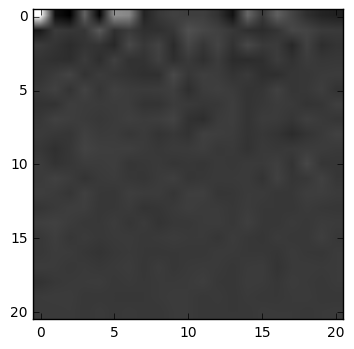

In [321]:
plt.figure(0)
plt.imshow(lop[1].reshape(21,21),cmap='gray')
plt.show()

In [322]:
trans_cm = np.cov(lop, rowvar=0)

In [323]:
a=pca.explained_variance_ratio_ 

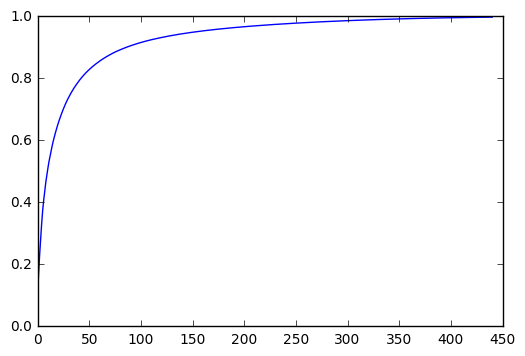

In [324]:
l=np.cumsum(a)
plt.plot(l)
plt.show()

In [325]:
print np.sum(a) #97% of variance explained

0.997777602007


In [326]:
Data=lop[:3000,:]
DAta=new[:3000,:]
Labels=labels[:3000]

In [308]:
from sklearn.neighbors import KNeighborsClassifier

In [332]:
knn=KNeighborsClassifier(3)
knn.fit(DAta,Labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [333]:
print knn.predict(new[4000:4020])

[8 8 0 5 0 0 3 8 2 1 2 5 6 3 0 6 6 1 3 9]


In [334]:
print knn.score(new[3000:5000],labels[3000:5000])*100
print "Accuracy of my algo"

91.85
Accuracy of my algo


In [327]:
knn=KNeighborsClassifier(3)
knn.fit(Data,Labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [328]:
print knn.predict(lop[4000:4020])

[8 8 0 5 0 0 3 8 3 1 2 5 6 3 0 6 6 1 3 9]


In [330]:
print knn.score(lop[3000:5000],labels[3000:5000])*100
print "Accuracy of sklearn"

91.4
Accuracy of sklearn


In [ ]:
#enter data for sklearn without normalisation